In [25]:
import tensorflow as tf
import numpy as np 
import pandas as pd
import os
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras import optimizers
from keras import regularizers
from keras.utils import to_categorical


In [26]:
# Load the data into a pandas DataFrame
print(os.getcwd())
df = pd.read_csv(
    filepath_or_buffer=os.getcwd()+'/../../data/monks/monks-1.train',
    names=['target', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'id'],
    delimiter=' '
)

# Display the loaded data
df

c:\Users\corra\Documents\GitHub\Machine_Learning_Project\frameworks\tfkeras


,target,col1,col2,col3,col4,col5,col6,id
NaN,1,1,1,1,1,3,1,data_5
NaN,1,1,1,1,1,3,2,data_6
NaN,1,1,1,1,3,2,1,data_19
NaN,1,1,1,1,3,3,2,data_22
NaN,1,1,1,2,1,2,1,data_27
...,...,...,...,...,...,...,...,...
NaN,1,3,3,2,1,4,2,data_416
NaN,1,3,3,2,3,1,2,data_426
NaN,1,3,3,2,3,2,2,data_428
NaN,1,3,3,2,3,3,2,data_430


In [27]:
# Initializing labels/targets vector
y = df['target'].values.astype(float)

# Drop of the IDs and the targets
df = df.drop(columns=['target','id'], axis=1)

# Initializing the one-hot DataFrame
df_copy = df.copy(deep=True)

# Iteration on the columns of the DataFrame
for column in df.columns:

    # Creation of the one-hot encoding's columns
    df_one_hot = pd.get_dummies(df[column], dtype=float)

    # Change the name of the columns
    df_one_hot = df_one_hot.set_axis([column+'_'+str(col) for col in df_one_hot.columns], axis=1)

    # Drop of the initial column
    df_copy.drop(labels=column, axis=1, inplace=True)

    # Concatenation of the new columns to the DataFrame
    df_copy = pd.concat([df_copy,df_one_hot], axis=1)


# Columns to drop
#columns_to_drop = ['col1_2', 'col1_3',	'col2_2', 'col2_3',  'col3_2',  'col4_2', 'col4_3', 'col5_2', 'col5_3', 'col5_4', 'col6_2']

# Drop the specified columns
#df_copy = df_copy.drop(columns=columns_to_drop)

# Print of the obtained DataFrame   col1_2	col1_3	 col2_2	col2_3  col3_2	col3_3  col4_2	col4_3	col5_2	col5_3 col6_2		
df_copy

,col1_1,col1_2,col1_3,col2_1,col2_2,col2_3,col3_1,col3_2,col4_1,col4_2,col4_3,col5_1,col5_2,col5_3,col5_4,col6_1,col6_2
NaN,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
NaN,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
NaN,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
NaN,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [28]:
# Parameters' space for Grid Search     
param_space = {
    'units': [3, 4],
    'optimizer': ['sgd'],
    'learning_rate': [0.2, 0.3],
    'batch_size': [128],
    'epochs': [400],
    'weight_decay': [0.001,0.002],
    'momentum': [0.5, 0.6],
    'loss': ['binary_crossentropy'],
    'activation': ['tanh'],
    'output_activation': ['sigmoid'],
    'metrics': ['accuracy']
}

# Parameters' space for Grid Search (accuracy=0.89)
#param_space = {
    #'units': [3, 4],
    #'optimizer': ['sgd'],
    #'learning_rate': [0.01, 0.05, 0.1, 0.2],
    #'batch_size': [15, 16, 17],
    #'epochs': [1250, 1500, 1750],
    #'weight_decay': [0.005, 0.01],
    #'momentum': [0.7, 0.8, 0.9],
    #'loss': ['binary_crossentropy'] #['log_loss', 'binary_crossentropy']
#}

## Model Selection

In [29]:



# Assigning new DataFrame to Data set variable
X = df_copy.values

# Number of trials with random combinations
num_trials = 15
for i in range(num_trials):
    
    # Random parameters
    params = {
        'units': np.random.choice(param_space['units']),
        'optimizer': np.random.choice(param_space['optimizer']),
        'learning_rate': np.random.choice(param_space['learning_rate']),
        'batch_size': np.random.choice(param_space['batch_size']),
        'epochs': np.random.choice(param_space['epochs']),
        'weight_decay': np.random.choice(param_space['weight_decay']),
        'momentum': np.random.choice(param_space['momentum']),
        'loss': np.random.choice(param_space['loss']),
        'activation': np.random.choice(param_space['activation']),
        'output_activation': np.random.choice(param_space['output_activation']),
        'metrics': np.random.choice(param_space['metrics']),
    }

    # Building the model
    model = Sequential()

    # Trial  5: Units=3, Optimizer: <keras.src.optimizers.sgd.SGD object at 0x000002568DBB0130>, Learning Rate=0.1, Weight Decay=0.5, Epochs=40, Batch Size=8, Momentum=0.7 Training Accuracy=0.7016, Validation Accuracy=0.7097
    # Trial  9: Units=3, Optimizer: <keras.src.optimizers.sgd.SGD object at 0x00000256895602E0>, Learning Rate=0.2, Weight Decay=0.7, Epochs=20, Batch Size=8, Momentum=0.7 Training Accuracy=0.6855, Validation Accuracy=0.6452
    # Trial  0: Units=3, Optimizer: <keras.src.optimizers.sgd.SGD object at 0x0000025688E4F850>, Learning Rate=0.2, Weight Decay=0.5, Epochs=10, Batch Size=8, Momentum=0.7 Training Accuracy=0.6532, Validation Accuracy=0.8065
    # Trial 11: Units=3, Optimizer: <keras.src.optimizers.sgd.SGD object at 0x0000025698CD55B0>, Learning Rate=0.2, Weight Decay=0.5, Epochs=10, Batch Size=8, Momentum=0.7 Training Accuracy=0.6935, Validation Accuracy=0.7419
    # Trial  8: Units=3, Optimizer: <keras.src.optimizers.sgd.SGD object at 0x0000025698C31460>, Learning Rate=0.2, Weight Decay=0.5, Epochs=20, Batch Size=8, Momentum=0.7 Training Accuracy=0.7339, Validation Accuracy=0.7419
    # Trial  3: Units=3, Optimizer: <keras.src.optimizers.sgd.SGD object at 0x0000019E9C1534C0>, Learning Rate=0.001, Weight Decay=3, Epochs=100, Batch Size=8, Momentum=0.7 Training Accuracy=0.7500, Validation Accuracy=0.6452
    # Trial 10: Units=3, Optimizer: <keras.src.optimizers.sgd.SGD object at 0x000001C070661F40>, Learning Rate=0.001, Weight Decay=6, Epochs=150, Batch Size=16, Momentum=0.7 Training Accuracy=0.7742, Validation Accuracy=0.6452
    # Trial  2: Units=3, Optimizer: <keras.src.optimizers.sgd.SGD object at 0x000001D72870C880>, Learning Rate=0.0001, Weight Decay=6, Epochs=300, Batch Size=128, Momentum=0.7 Training Accuracy=0.6290, Validation Accuracy=0.7419
    # Trial  8: Units=3, Optimizer: <keras.src.optimizers.sgd.SGD object at 0x000001D72A3F2CA0>, Learning Rate=0.0001, Weight Decay=6, Epochs=300, Batch Size=128, Momentum=0.7 Training Accuracy=0.7177, Validation Accuracy=0.6129
    # Trial 13: Units=3, Optimizer: <keras.src.optimizers.sgd.SGD object at 0x000001D726D57EB0>, Learning Rate=0.0001, Weight Decay=7, Epochs=300, Batch Size=64, Momentum=0.05 Training Accuracy=0.7016, Validation Accuracy=0.7097
    # Trial  9: Units=3, Optimizer: <keras.src.optimizers.sgd.SGD object at 0x000001D72B51B0D0>, Learning Rate=0.0001, Weight Decay=8, Epochs=400, Batch Size=128, Momentum=0.05 Training Accuracy=0.6935, Validation Accuracy=0.6452
    # Trial 14: Units=3, Act: relu, Optimizer: <keras.src.optimizers.sgd.SGD object at 0x000001AAA5248490>, Learning Rate=0.2, Weight Decay=0.001, Epochs=400, Batch Size=128, Momentum=0.6 Training Accuracy=0.7339, Validation Accuracy=0.7742
    # Trial  0: Units=4, Act: tanh, Optimizer: <keras.src.optimizers.sgd.SGD object at 0x000001AA9F21AEB0>, Learning Rate=0.3, Weight Decay=0.001, Epochs=400, Batch Size=128, Momentum=0.6 Training Accuracy=0.6855, Validation Accuracy=0.6452








    # Add fully connected units to the NN
    #model.add(Dense(units=params['units'], activation=params['activation'], kernel_regularizer=regularizers.l2(params['weight_decay']), use_bias=True))
    model.add(Dense(units=1, activation=params['output_activation'], use_bias=True))
    
    # Set the optimizer with the sampled learning rate
    if params['optimizer'] == 'adam':
        optimizer = optimizers.Adam()
    elif params['optimizer'] == 'sgd':
        optimizer = optimizers.SGD()
    else:
        raise ValueError("Unsupported optimizer")

    # Sets the Loss Function, the Optimizer used in the model and the Metrics used for evaluation
    model.compile(loss=params['loss'], optimizer="sgd", metrics=params['metrics'],)

    # Sets the Early Stopping for the model
    #early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Training of the model with validation split
    history = model.fit(
        x=X,
        y=y,
        epochs=params['epochs'],
        batch_size=params['batch_size'],
        validation_split=0.25,  # 25% of the data will be used for validation
        verbose=0
    )

    # Evaluate on both training and validation sets
    loss, training_accuracy = model.evaluate(X, y, verbose=0)
    validation_accuracy = history.history['val_accuracy'][-1]


    # Reset of the previous Plot
    plt.figure()

    # Plot the learning curve
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Learning Curve')
    plt.xlabel('Epoch')
    plt.legend()

  # Print the used parameters and both training and validation accuracies
    print(f"Trial {i:>2}: Units={params['units']}, Act: {params['activation']}, Optimizer: {optimizer}, "
          f"Learning Rate={params['learning_rate']}, Weight Decay={params['weight_decay']}, "
          f"Epochs={params['epochs']}, Batch Size={params['batch_size']}, "
          f"Momentum={params['momentum']} Training Accuracy={training_accuracy:.4f}, "
          f"Validation Accuracy={validation_accuracy:.4f}")
    


    # Print of the Plot
    plt.show()

KeyboardInterrupt: 

# Cross fold validation 

In [33]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.callbacks import EarlyStopping

# Parameters' space for Grid Search
param_space = {
    'units': [3, 4],
    'optimizer': ['sgd'],
    'learning_rate': [0.2, 0.3],
    'batch_size': [64, 128],
    'epochs': [300, 400, 500],
    'weight_decay': [0.001, 0.002],
    'momentum': [0.5, 0.6],
    'activation': ['tanh', 'relu'],
    'metrics': ['accuracy']
}

# Assigning new DataFrame to Data set variable
X = df_copy.values

# Number of trials with random combinations
num_trials = 15

# K-fold Cross-validation
num_folds = 5
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Lists to store training and validation accuracies
training_accuracies = []
validation_accuracies = []

# Lists to store best hyperparameters
best_hyperparameters = {
    'trial': 0,
    'params': {},
    'mean_validation_accuracy': 0
}

for i in range(num_trials):
    # Random parameters
    params = {
        'units': np.random.choice(param_space['units']),
        'optimizer': np.random.choice(param_space['optimizer']),
        'learning_rate': np.random.choice(param_space['learning_rate']),
        'batch_size': np.random.choice(param_space['batch_size']),
        'epochs': np.random.choice(param_space['epochs']),
        'weight_decay': np.random.choice(param_space['weight_decay']),
        'momentum': np.random.choice(param_space['momentum']),
        'activation': np.random.choice(param_space['activation']),
        'metrics': np.random.choice(param_space['metrics']),
    }

    # Lists to store fold-wise accuracies
    fold_training_accuracies = []
    fold_validation_accuracies = []

    for train_index, val_index in kf.split(X, y):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Build the model
        model = Sequential()
        model.add(Dense(units=params['units'], activation=params['activation'], use_bias=True))
        model.add(Dense(units=1, activation='sigmoid', use_bias=True))

        # Set the optimizer with the sampled learning rate
        if params['optimizer'] == 'adam':
            opt = optimizers.Adam(learning_rate=params['learning_rate'])
        elif params['optimizer'] == 'sgd':
            opt = optimizers.SGD(learning_rate=params['learning_rate'], momentum=params['momentum'])
        else:
            raise ValueError("Unsupported optimizer")

        # Sets the Loss Function, the Optimizer used in the model, and the Metrics used for evaluation
        model.compile(loss='binary_crossentropy', optimizer=opt, metrics=[params['metrics']])

        # Set the Early Stopping for the model
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

        # Training of the model with validation split and early stopping
        history = model.fit(
            x=X_train,
            y=y_train,
            epochs=params['epochs'],
            batch_size=params['batch_size'],
            validation_data=(X_val, y_val),
            callbacks=[early_stopping],  # Add early stopping callback
            verbose=0
        )

        # Evaluate on both training and validation sets
        training_accuracy = model.evaluate(X_train, y_train, verbose=0)[1]
        validation_accuracy = model.evaluate(X_val, y_val, verbose=0)[1]

        fold_training_accuracies.append(training_accuracy)
        fold_validation_accuracies.append(validation_accuracy)

    # Calculate mean accuracies across folds for this trial
    mean_training_accuracy = np.mean(fold_training_accuracies)
    mean_validation_accuracy = np.mean(fold_validation_accuracies)

    # Store mean accuracies for this trial
    training_accuracies.append(mean_training_accuracy)
    validation_accuracies.append(mean_validation_accuracy)

    # Print mean accuracies and hyperparameters for this trial
    print(f"Trial {i+1}: Mean Training Accuracy={mean_training_accuracy:.4f}, Mean Validation Accuracy={mean_validation_accuracy:.4f}")
    print("Hyperparameters:", params)

    # Update best hyperparameters if current trial has higher validation accuracy
    if mean_validation_accuracy > best_hyperparameters['mean_validation_accuracy']:
        best_hyperparameters['trial'] = i + 1
        best_hyperparameters['params'] = params
        best_hyperparameters['mean_validation_accuracy'] = mean_validation_accuracy

# Print overall mean accuracies
print(f"\nOverall Mean Training Accuracy: {np.mean(training_accuracies):.4f}")
print(f"Overall Mean Validation Accuracy: {np.mean(validation_accuracies):.4f}")

# Print best hyperparameters
print("\nBest Hyperparameters:")
print("Trial:", best_hyperparameters['trial'])
print("Hyperparameters:", best_hyperparameters['params'])
print("Mean Validation Accuracy:", best_hyperparameters['mean_validation_accuracy'])


Trial 1: Mean Training Accuracy=0.8486, Mean Validation Accuracy=0.7187
Hyperparameters: {'units': 4, 'optimizer': 'sgd', 'learning_rate': 0.3, 'batch_size': 128, 'epochs': 400, 'weight_decay': 0.001, 'momentum': 0.6, 'activation': 'relu', 'metrics': 'accuracy'}
Trial 2: Mean Training Accuracy=0.8609, Mean Validation Accuracy=0.8063
Hyperparameters: {'units': 4, 'optimizer': 'sgd', 'learning_rate': 0.2, 'batch_size': 128, 'epochs': 400, 'weight_decay': 0.002, 'momentum': 0.5, 'activation': 'tanh', 'metrics': 'accuracy'}
Trial 3: Mean Training Accuracy=0.8812, Mean Validation Accuracy=0.7907
Hyperparameters: {'units': 4, 'optimizer': 'sgd', 'learning_rate': 0.2, 'batch_size': 64, 'epochs': 400, 'weight_decay': 0.001, 'momentum': 0.6, 'activation': 'relu', 'metrics': 'accuracy'}
Trial 4: Mean Training Accuracy=0.8951, Mean Validation Accuracy=0.8630
Hyperparameters: {'units': 3, 'optimizer': 'sgd', 'learning_rate': 0.3, 'batch_size': 64, 'epochs': 500, 'weight_decay': 0.002, 'momentum': 

0.4335615038871765
0.75
0.8199999928474426
{'units': 3, 'optimizer': 'sgd', 'learning_rate': 0.3, 'batch_size': 128, 'epochs': 400, 'weight_decay': 0.002, 'momentum': 0.5, 'activation': 'tanh', 'metrics': 'accuracy'}


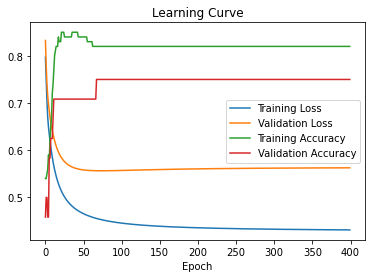

In [ ]:
# Plot the learning curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.legend()
print(loss)
print(validation_accuracy)
print(training_accuracy)
print(params)
